Augmented: 0 from 3065 images
Augmented: 100 from 3065 images
Augmented: 200 from 3065 images
Augmented: 300 from 3065 images
Augmented: 400 from 3065 images
Augmented: 500 from 3065 images
Augmented: 600 from 3065 images
Augmented: 700 from 3065 images
Augmented: 800 from 3065 images
Augmented: 900 from 3065 images
Augmented: 1000 from 3065 images
Augmented: 1100 from 3065 images
Augmented: 1200 from 3065 images
Augmented: 1300 from 3065 images
Augmented: 1400 from 3065 images
Augmented: 1500 from 3065 images
Augmented: 1600 from 3065 images
Augmented: 1700 from 3065 images
Augmented: 1800 from 3065 images
Augmented: 1900 from 3065 images
Augmented: 2000 from 3065 images
Augmented: 2100 from 3065 images
Augmented: 2200 from 3065 images
Augmented: 2300 from 3065 images
Augmented: 2400 from 3065 images
Augmented: 2500 from 3065 images
Augmented: 2600 from 3065 images
Augmented: 2700 from 3065 images
Augmented: 2800 from 3065 images
Augmented: 2900 from 3065 images
Augmented: 3000 from 3

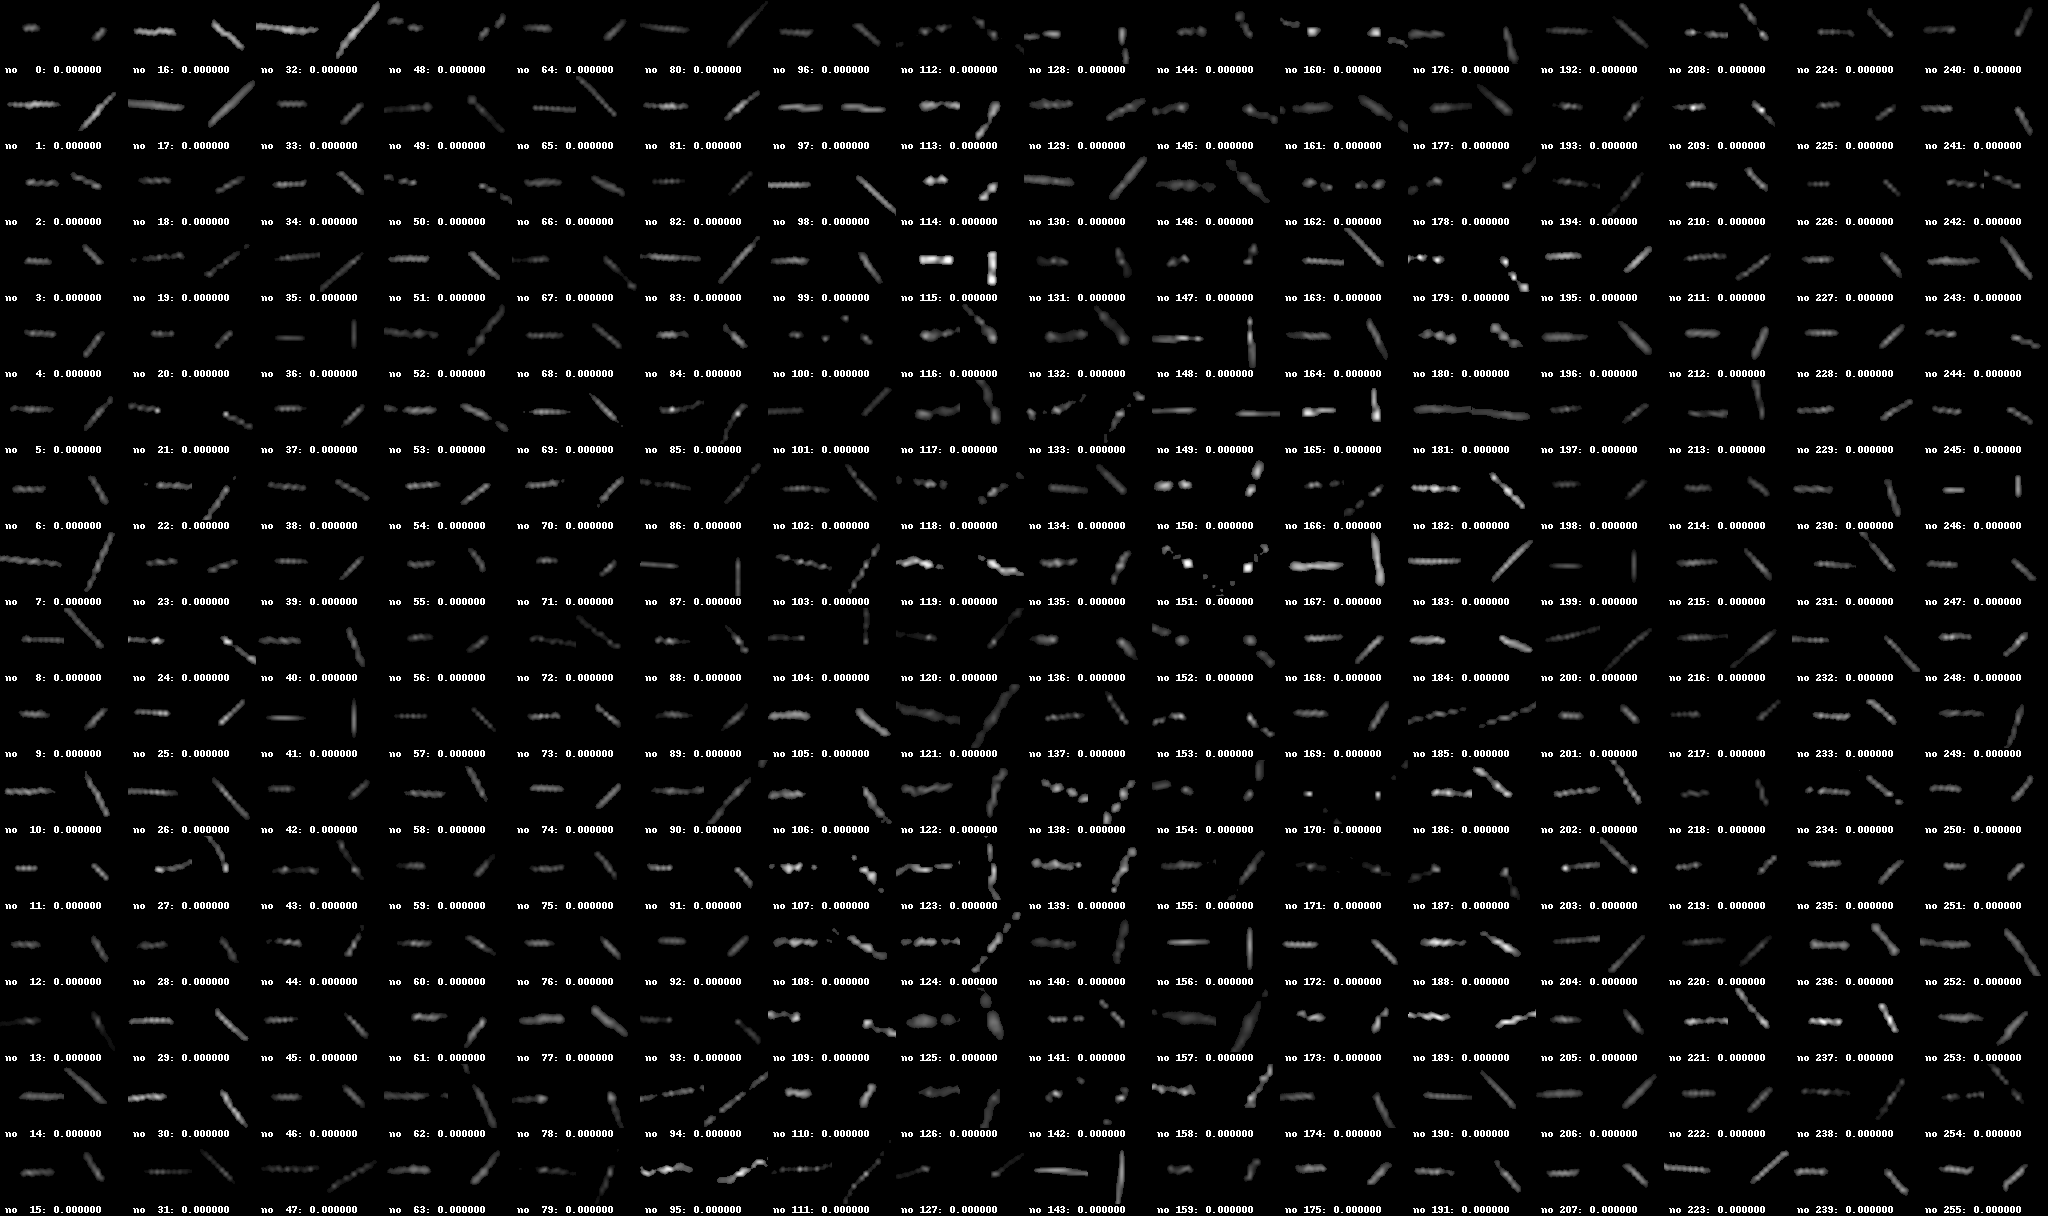

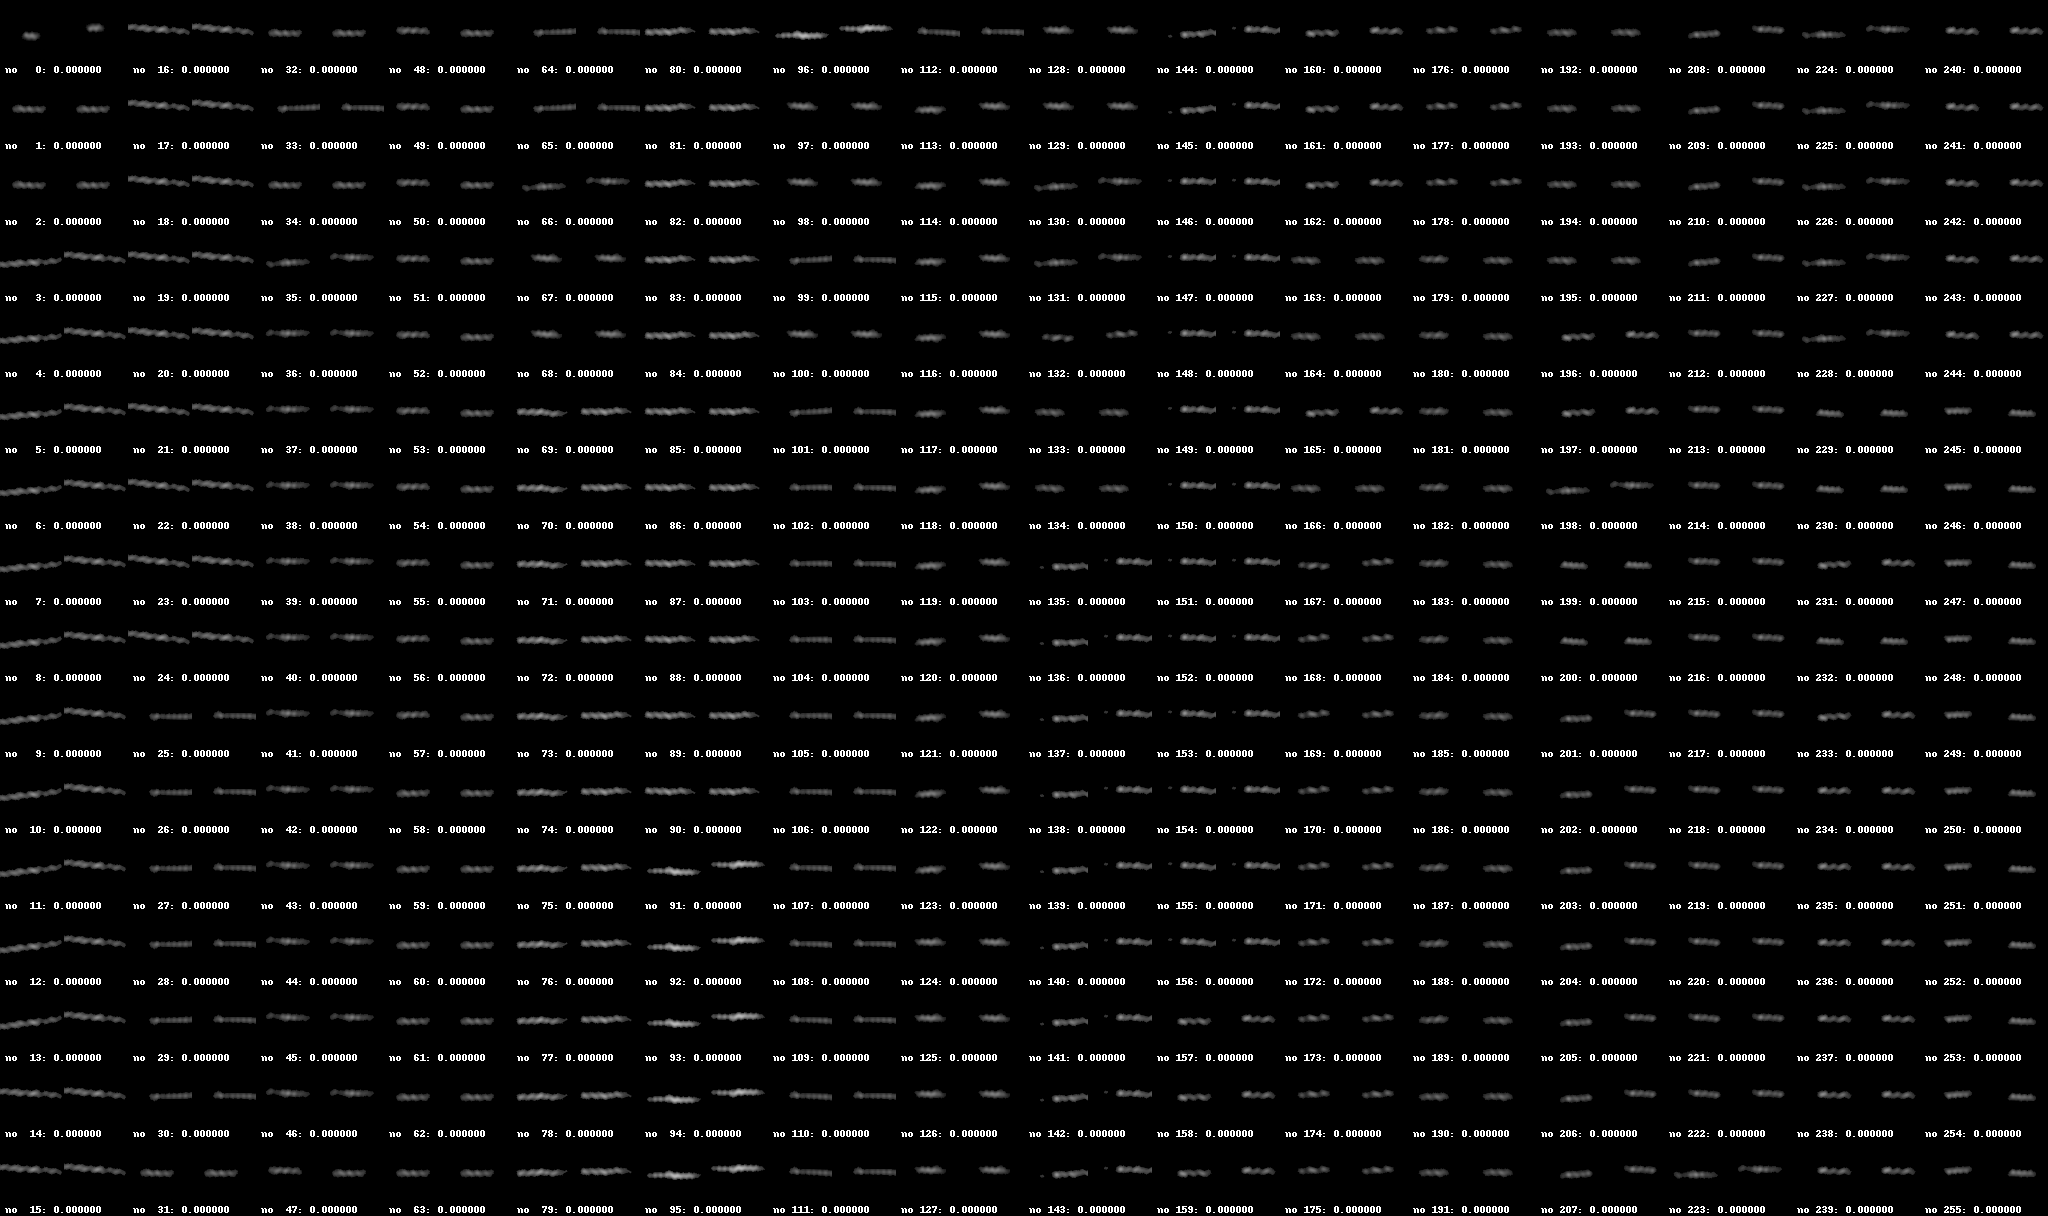

Augmented: 0 from 1875 images
Augmented: 100 from 1875 images
Augmented: 200 from 1875 images
Augmented: 300 from 1875 images
Augmented: 400 from 1875 images
Augmented: 500 from 1875 images
Augmented: 600 from 1875 images
Augmented: 700 from 1875 images
Augmented: 800 from 1875 images
Augmented: 900 from 1875 images
Augmented: 1000 from 1875 images
Augmented: 1100 from 1875 images
Augmented: 1200 from 1875 images
Augmented: 1300 from 1875 images
Augmented: 1400 from 1875 images
Augmented: 1500 from 1875 images
Augmented: 1600 from 1875 images
Augmented: 1700 from 1875 images
Augmented: 1800 from 1875 images


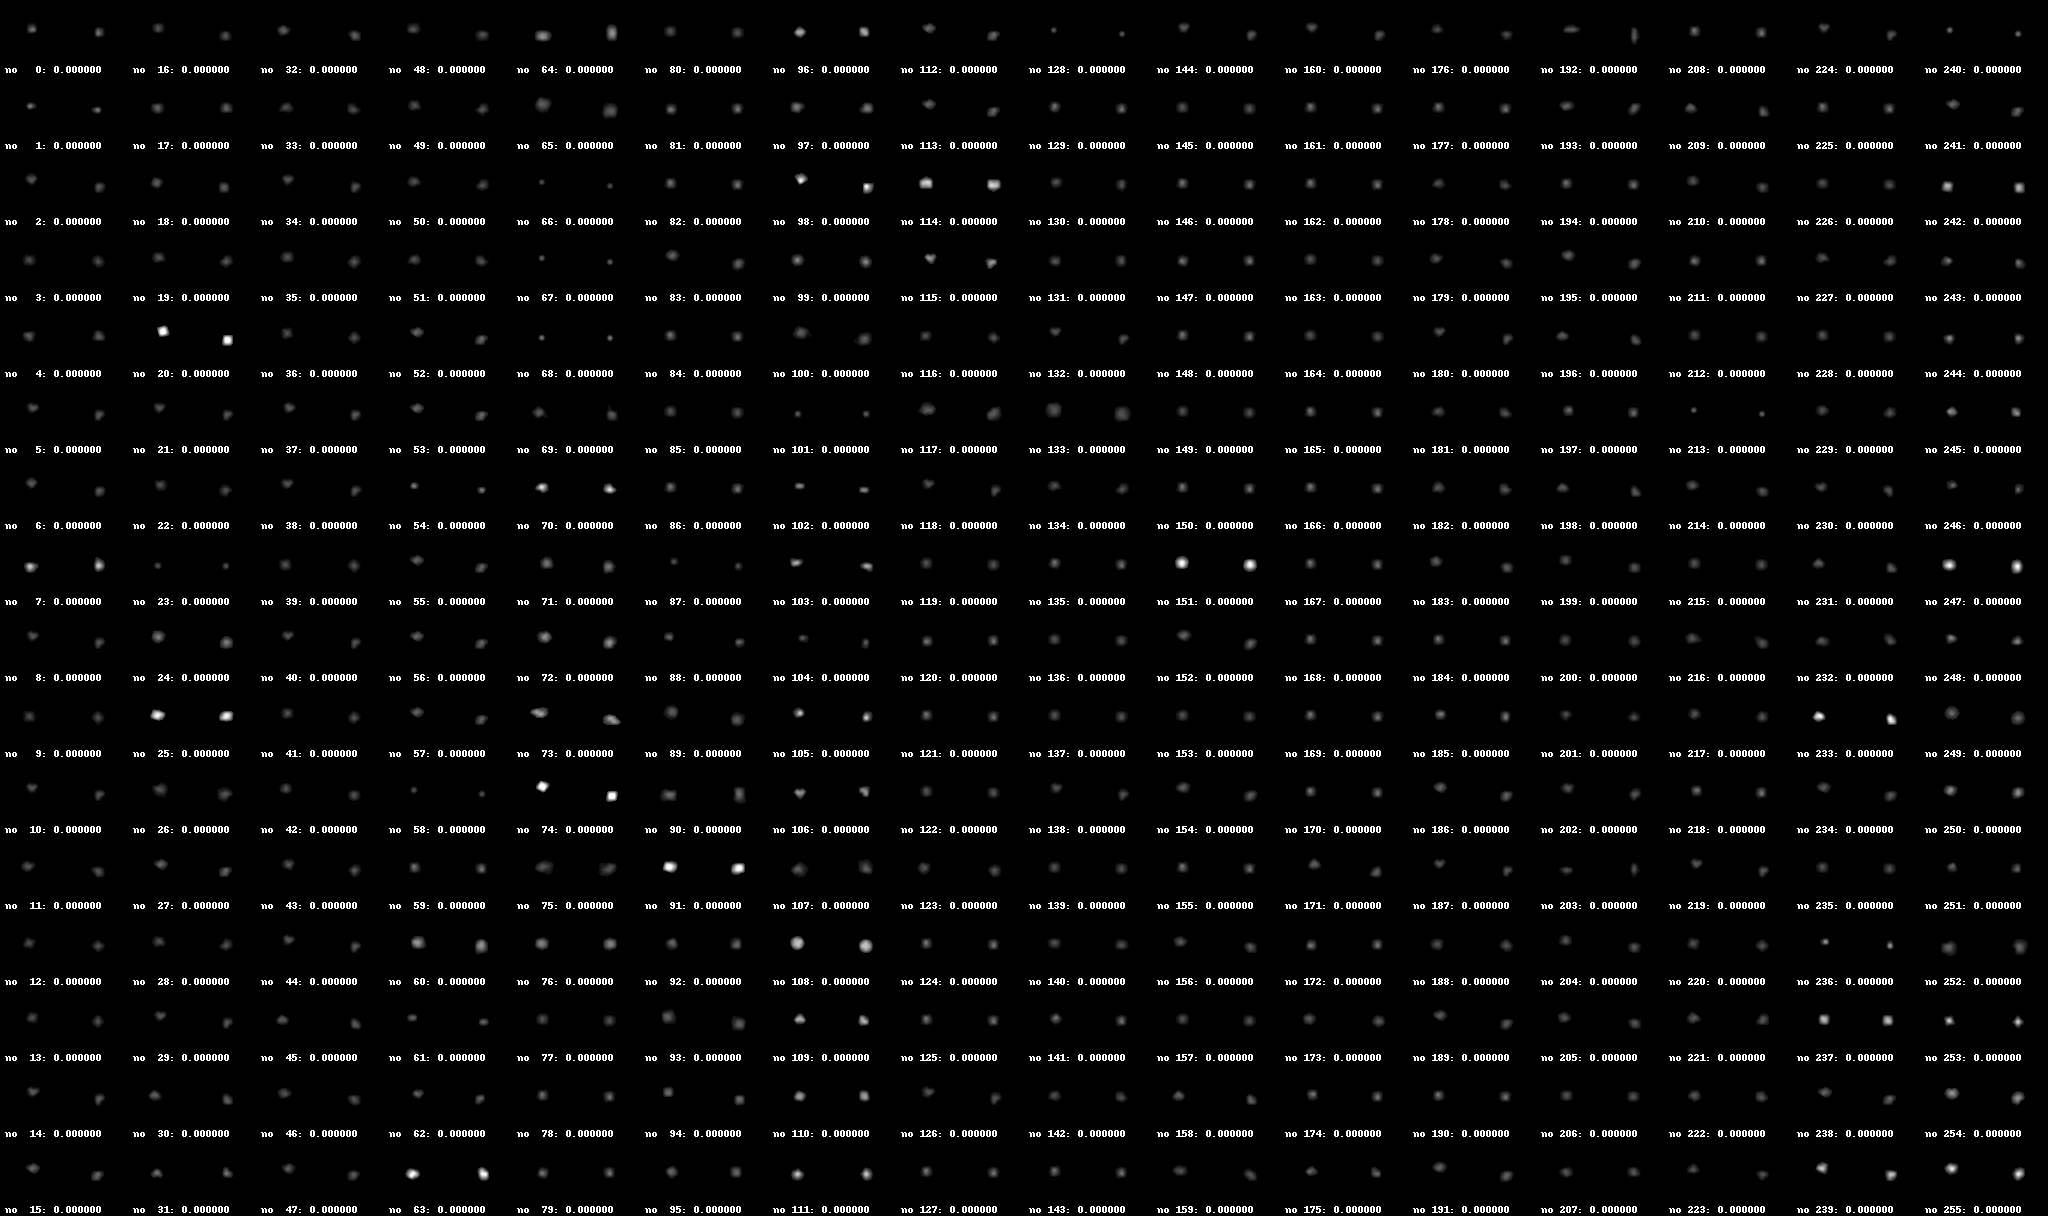

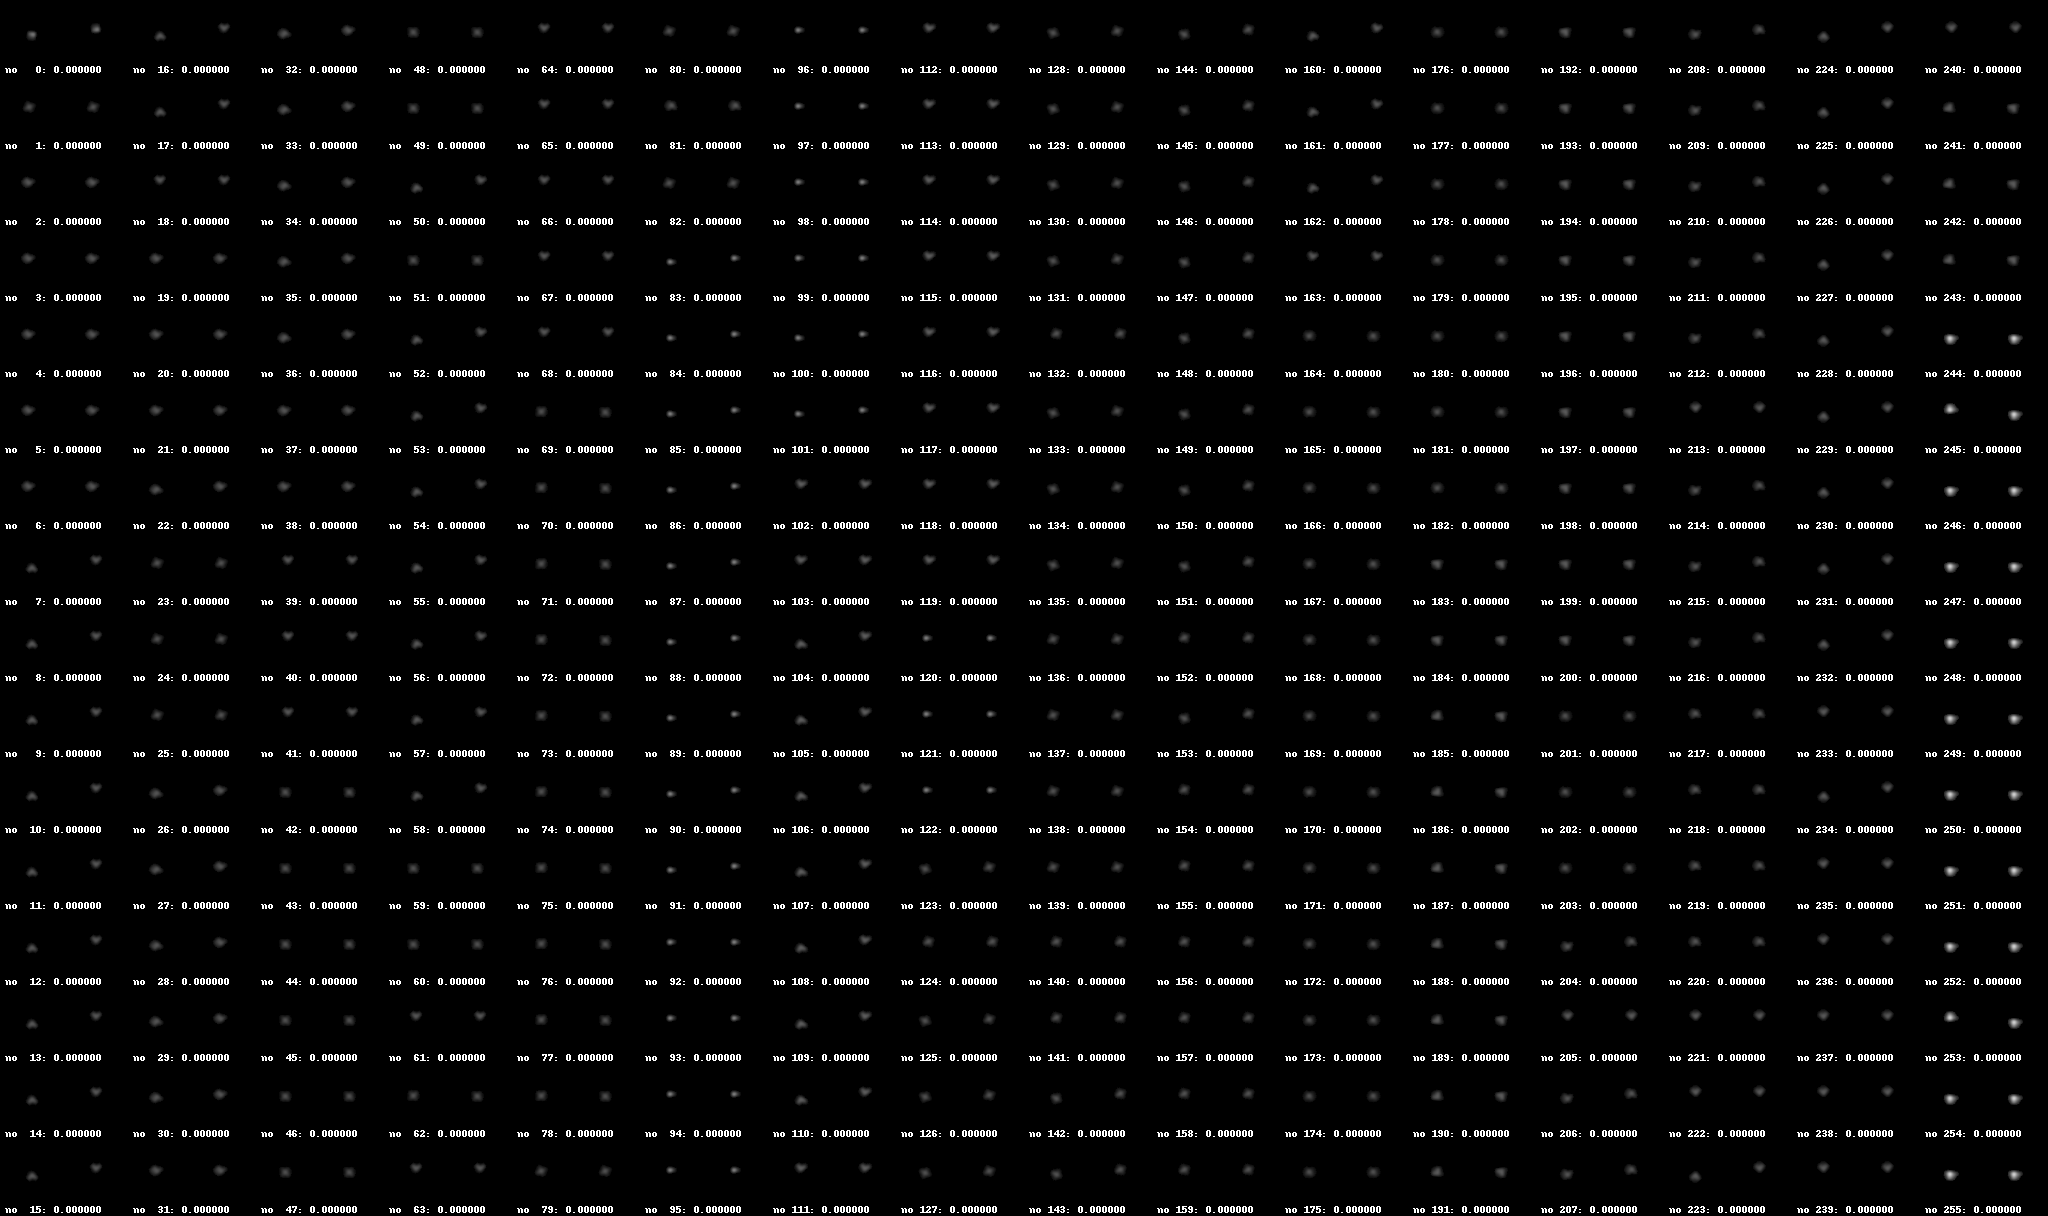

Augmented: 0 from 496 images
Augmented: 100 from 496 images
Augmented: 200 from 496 images
Augmented: 300 from 496 images
Augmented: 400 from 496 images


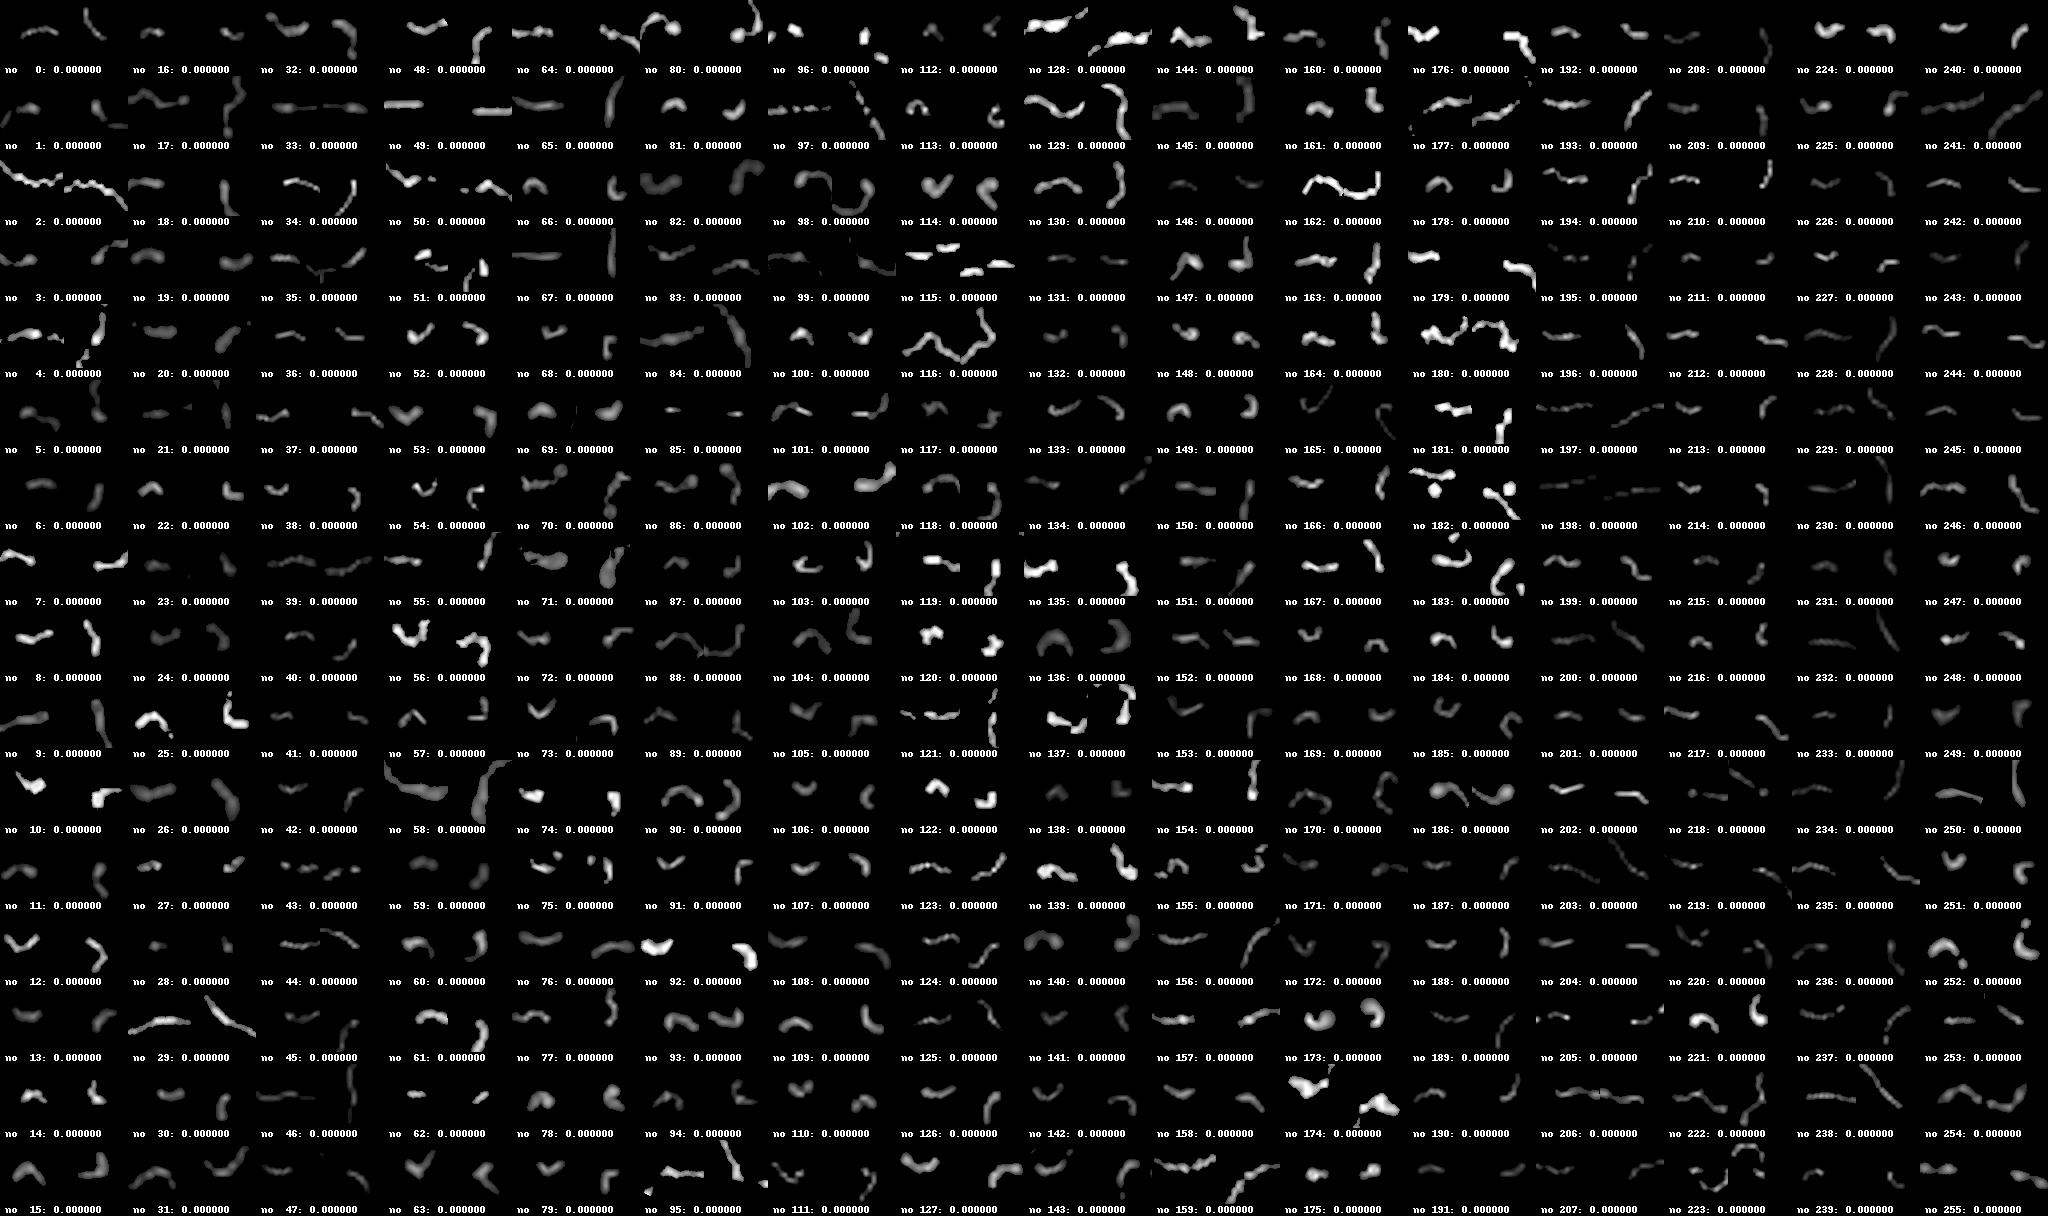

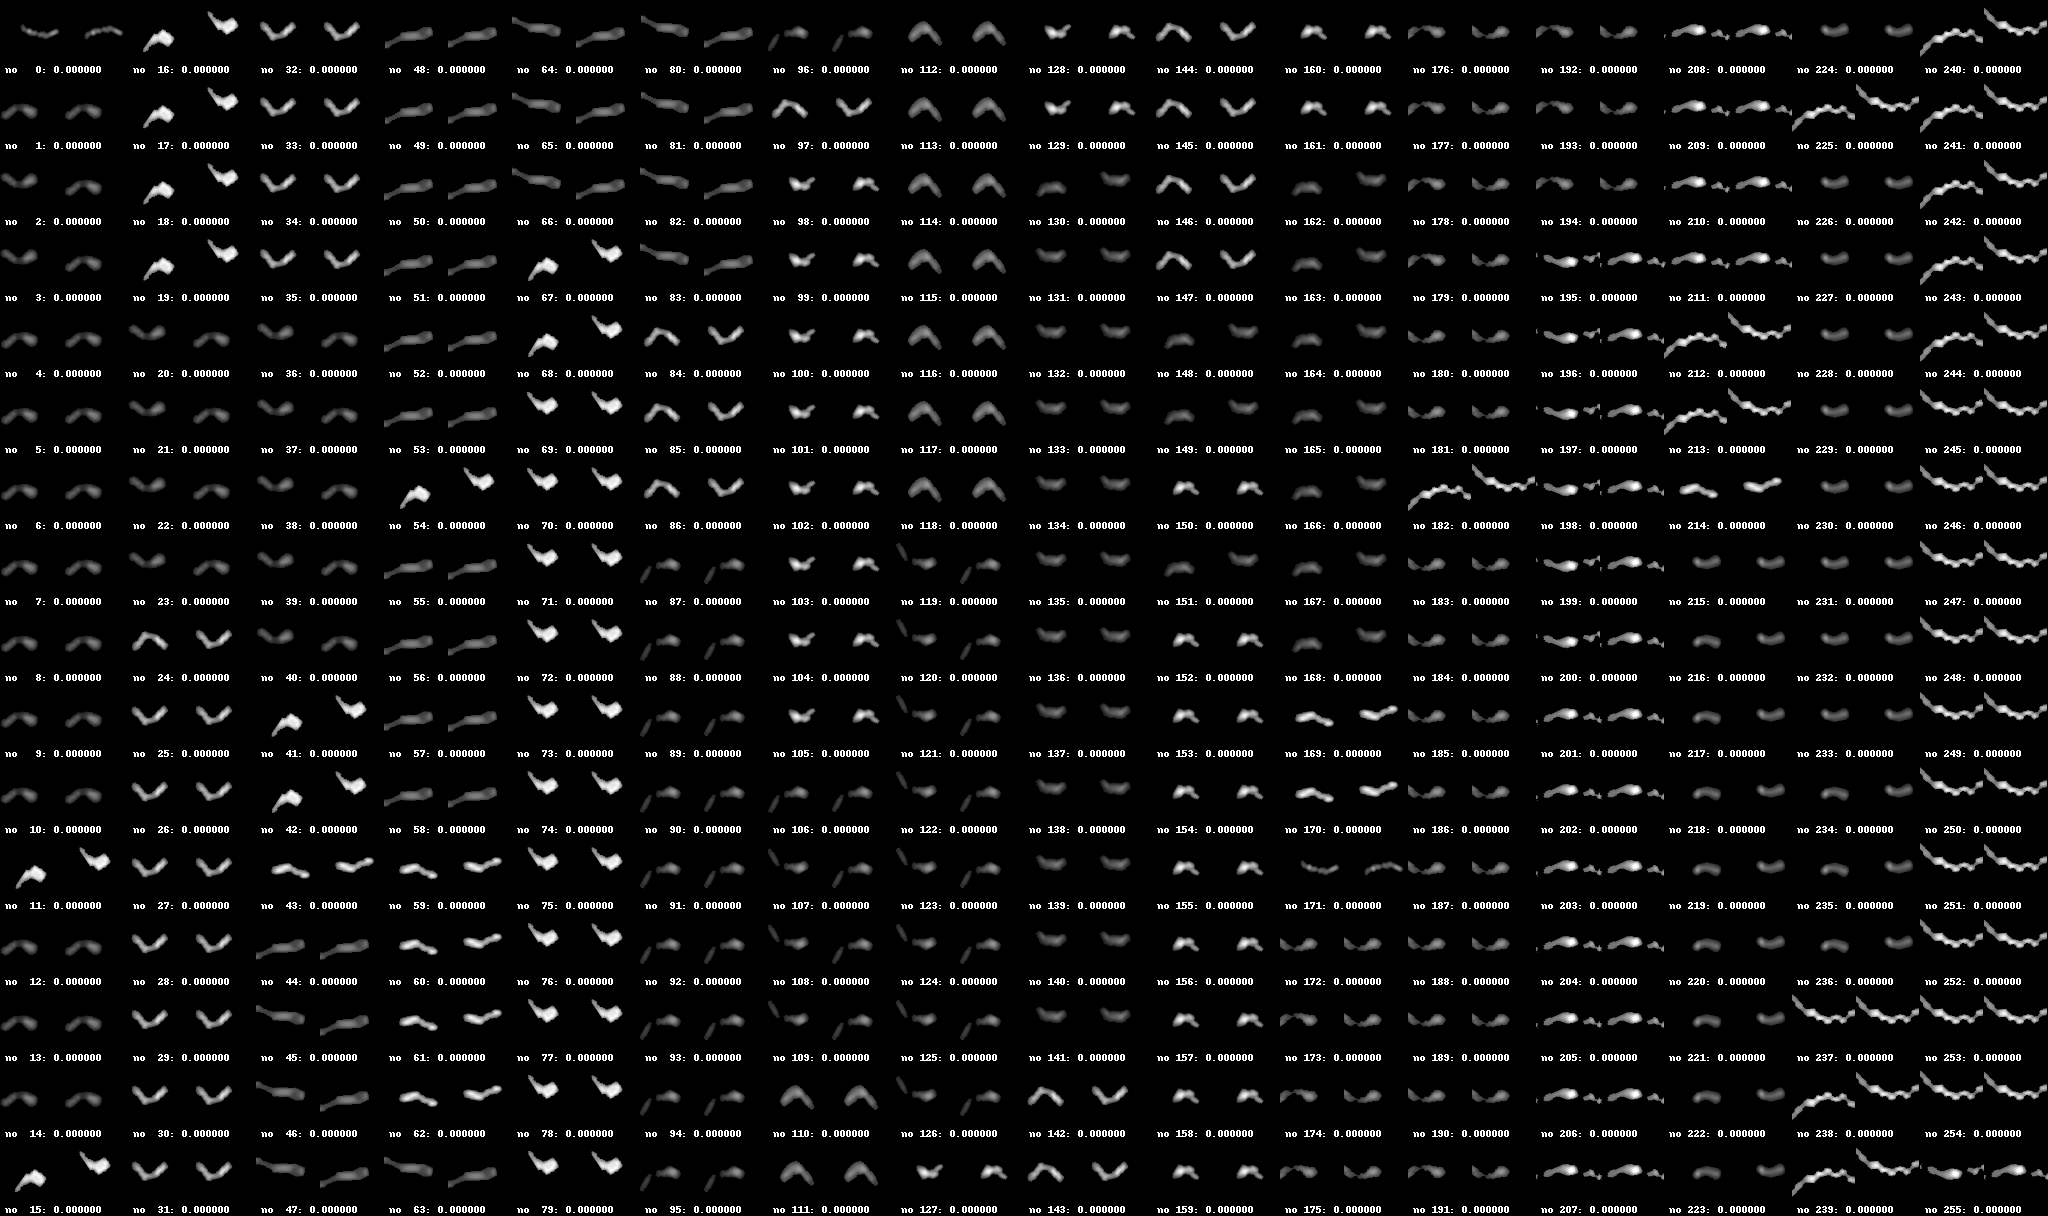

Augmented: 0 from 646 images
Augmented: 100 from 646 images
Augmented: 200 from 646 images
Augmented: 300 from 646 images
Augmented: 400 from 646 images
Augmented: 500 from 646 images
Augmented: 600 from 646 images


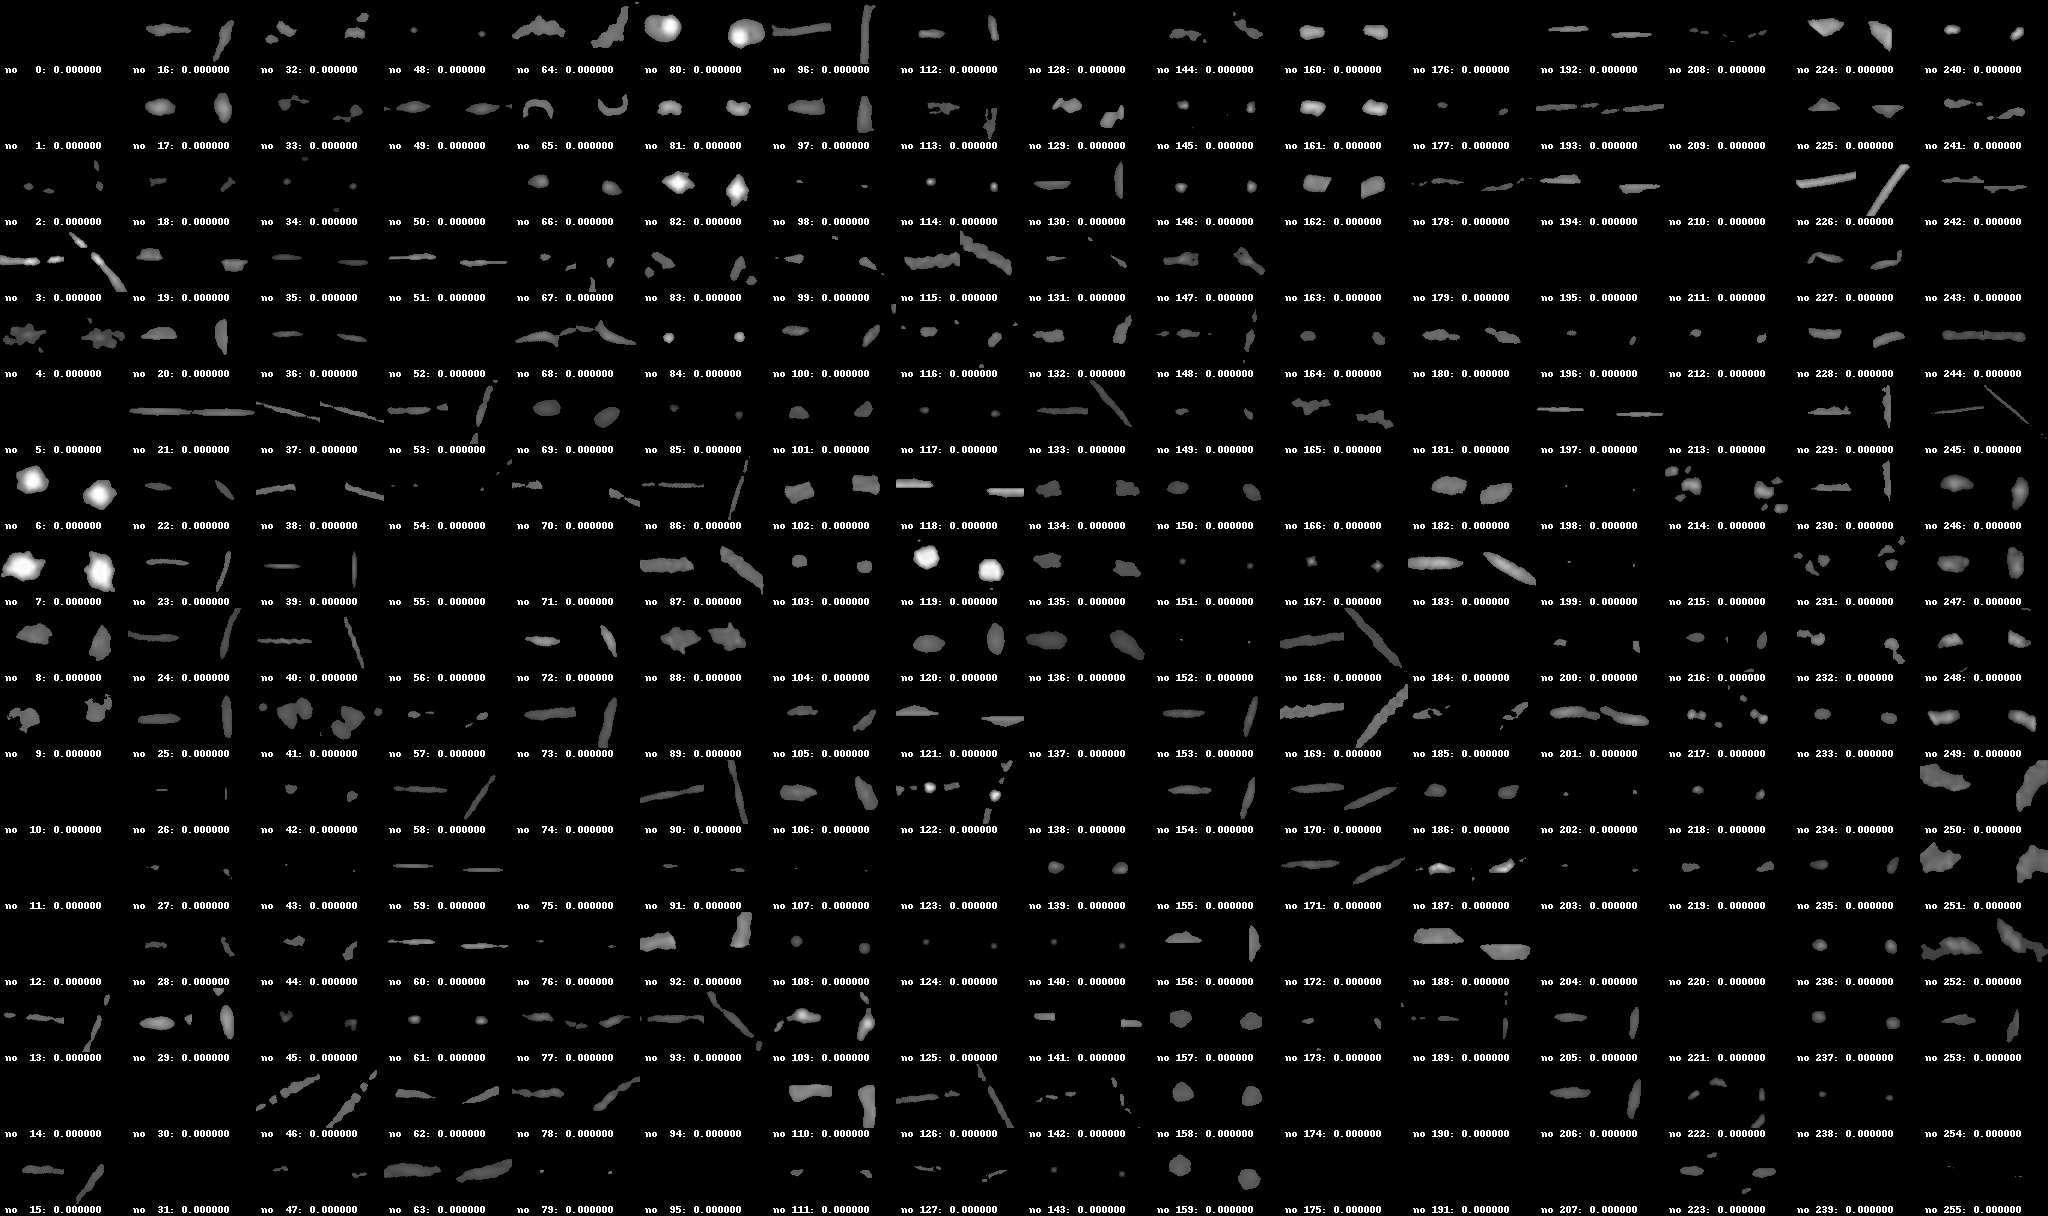

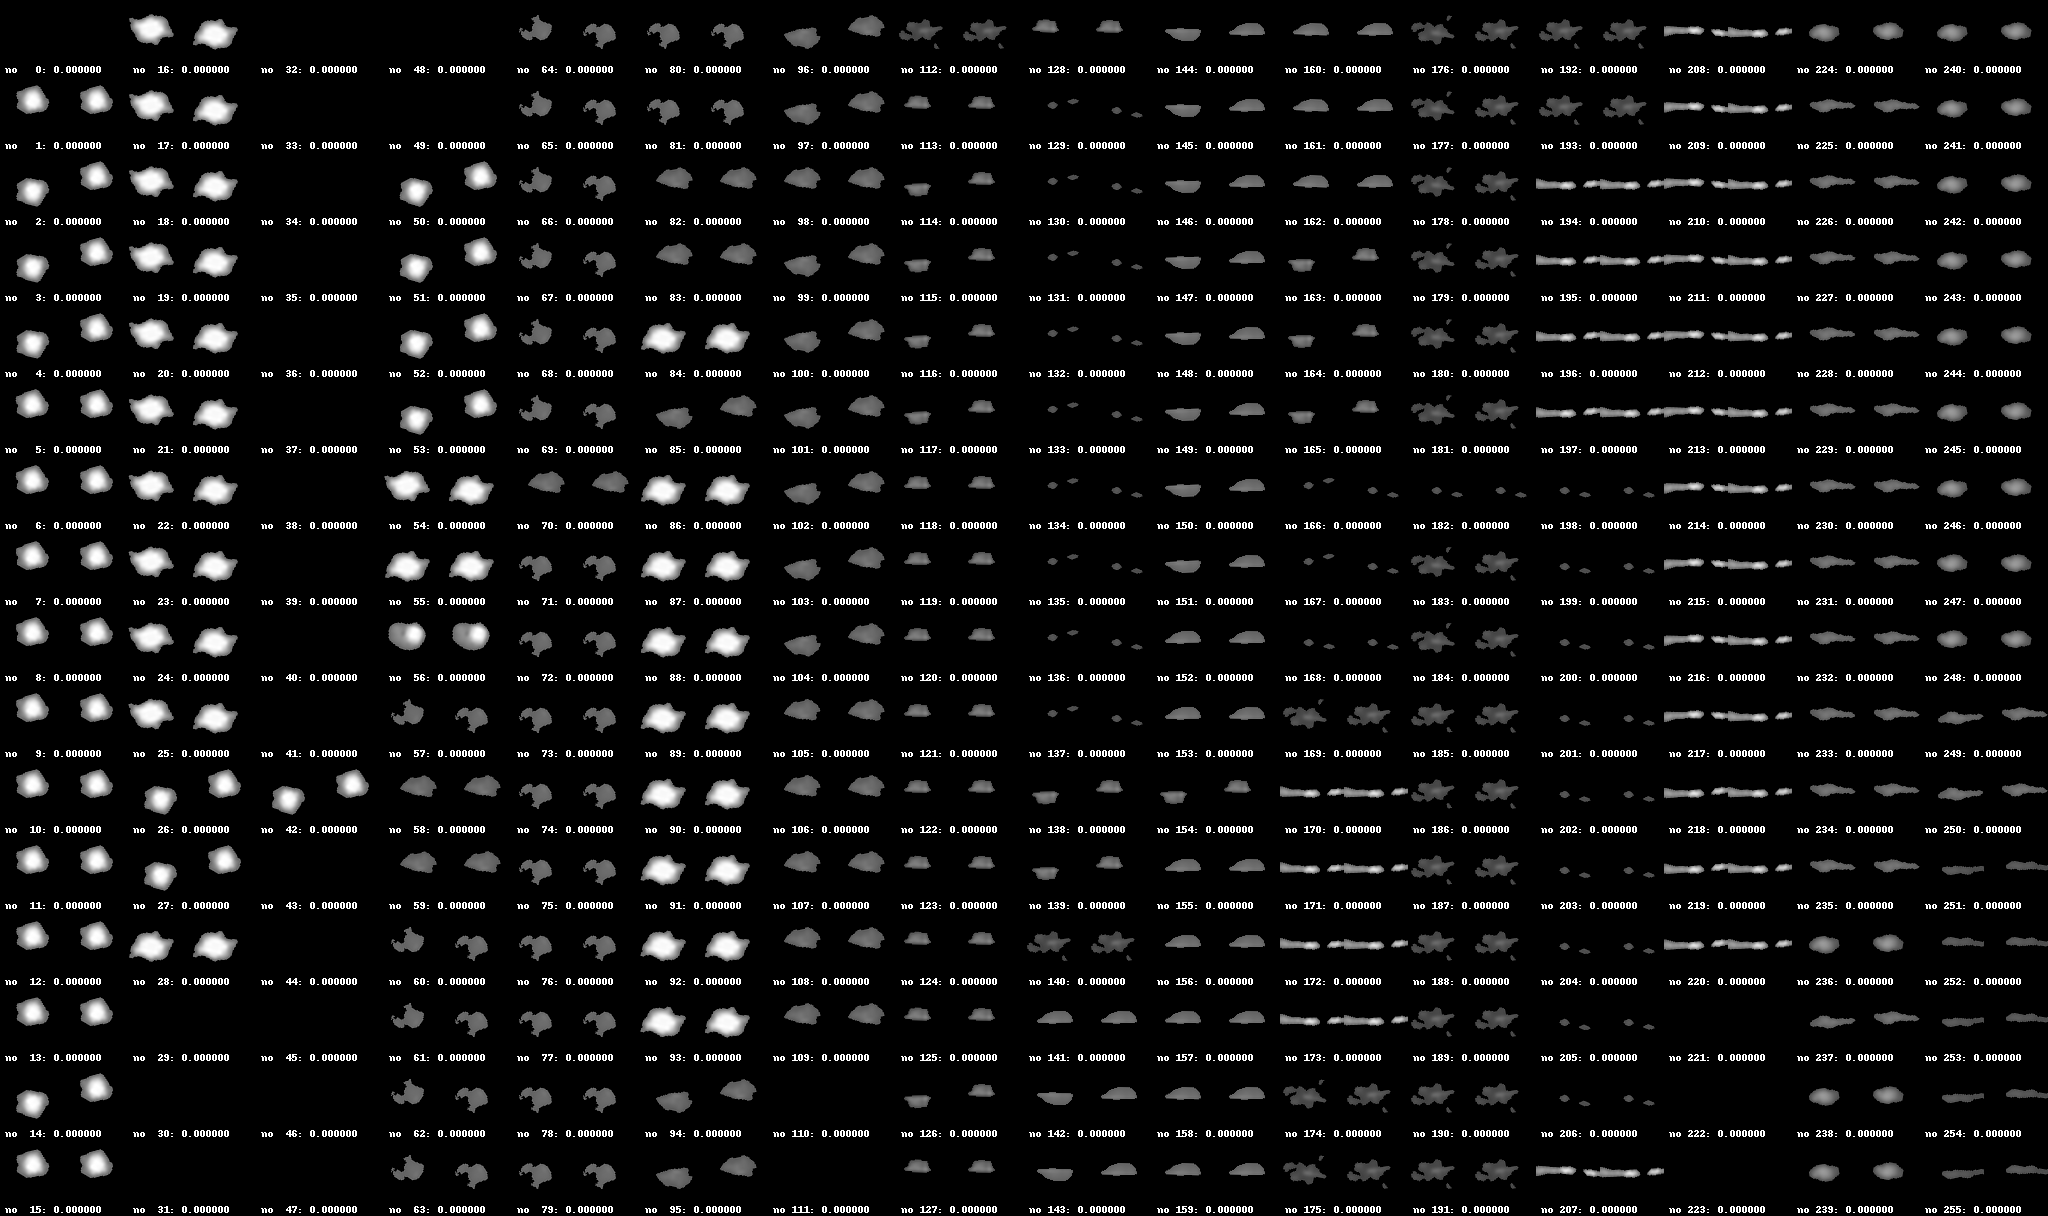

done


In [1]:
from keras.layers import RandomFlip, RandomRotation
import tensorflow as tf
import numpy as np
from PIL import Image
import os
from scipy.ndimage import rotate
from dataset_loader import load_dataset_with_augmentation, save_to_file, load_from_file, cut_image_to_size

DOTS_ORIG = 'cache/dots_v3.pickle'
TRACKS_ORIG = 'cache/tracks_v3.pickle'
WORMS_ORIG = 'cache/worms_v3.pickle'
ARTIFACTS_ORIG = 'cache/artifacts_v3.pickle'

DOTS_SRC = 'hit-images-final2/dot'
DOTS_DST = 'cache/dots_v3_spread.pickle'

TRACKS_SRC = 'hit-images-final2/line'
TRACKS_DST = 'cache/tracks_v3_spread.pickle'

WORMS_SRC = 'hit-images-final2/worms'
WORMS_DST = 'cache/worms_v3_spread.pickle'

ARTIFACTS_SRC = 'hit-images-final2/artefact'
ARTIFACTS_DST = 'cache/artifacts_v3_spread.pickle'

from commons import round_normalize_spread, tmp_visualize
from dataset_loader import load_images


def make_augmentations(images, mul=1):
    normalized = []
    normalized_a = []
    if mul == 1:
        return images

    mul_range = []
    for i in range(0, mul):
        m = i / mul * 4 - 2
        if m != 0:
            mul_range.append(m)

    arr = []
    for i, image in enumerate(images):

        normalized_round, deg_orig = round_normalize_spread(image)
        normalized.append(normalized_round)

        #im = Image.fromarray((image * 255).astype(np.uint8))
        mask = np.where(image == 0, 0.0, 1.0)
        for flip in [False, True]:
            for j in mul_range:
                deg = deg_orig + j

                augmented_image = rotate(image, deg, reshape=False)
                augmented_mask = rotate(mask, deg, reshape=False)
                if flip:
                    augmented_image = np.flipud(augmented_image)
                    augmented_mask = np.flipud(augmented_mask)
                #augmented_image -= augmented_image.min()
                normalized_a.append(normalized_round)
                augmented_image = np.where(augmented_mask < 0.25, 0, augmented_image)
                augmented_image = np.where(augmented_image < 0, 0, augmented_image)
                augmented_image = np.where(augmented_image > 1, 1, augmented_image)
                #ai_max = augmented_image.max()
                #if ai_max > 1:
                    #augmented_image *= 1/ai_max
                arr.append(cut_image_to_size(augmented_image, 64))
        if i % 100 == 0:
            print('Augmented: %d from %d images' % (i, len(images)))

    augs = np.vstack([arr])
    tmp_visualize(images, normalized)
    tmp_visualize(normalized_a, augs)
    return normalized, augs

save_to_file(TRACKS_DST, make_augmentations(load_from_file(TRACKS_ORIG)[0], 12))
save_to_file(DOTS_DST, make_augmentations(load_from_file(DOTS_ORIG)[0], 12))
save_to_file(WORMS_DST, make_augmentations(load_from_file(WORMS_ORIG)[0], 12))
save_to_file(ARTIFACTS_DST, make_augmentations(load_from_file(ARTIFACTS_ORIG)[0], 12))

print('done')